In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys; sys.path.insert(0, '../')
from geoplot import utils
import geoplot as gplt
from geoplot import crs as ccrs
import geopandas as gpd
import pandas as pd
import shapely
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

`plt.savefig` is not working, for the moment I am just saving plot output manually. Obviously that will have to change.

# Pointplot

In [130]:
mkdir ./figures/pointplot

mkdir: ./figures/pointplot: File exists


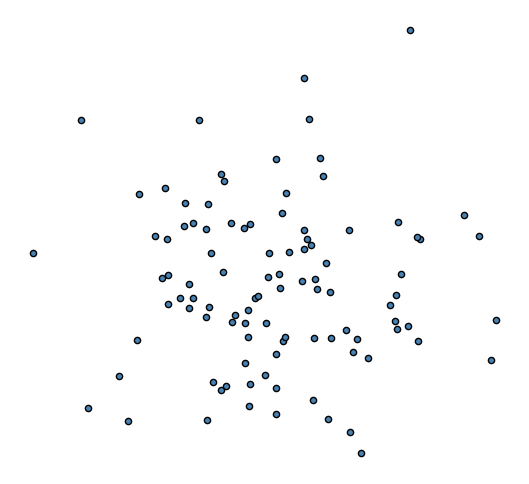

In [6]:
points = utils.gaussian_points()
gplt.pointplot(points, projection=ccrs.PlateCarree())
# fig = plt.gcf()
# fig.savefig('./figures/pointplot/pointplot_demo_1.png')

In [26]:
cities = gpd.read_file("./data/citiesx010g.shp")
cities = cities[cities['STATE'].map(lambda s: s not in ['PR', 'AK', 'HI', 'VI'])]

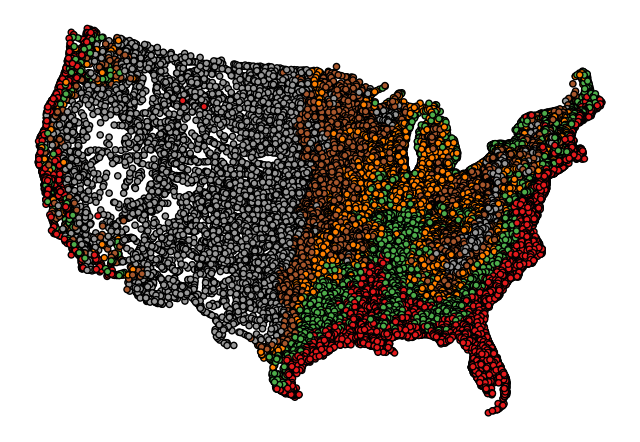

In [58]:
gplt.pointplot(cities, projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT')

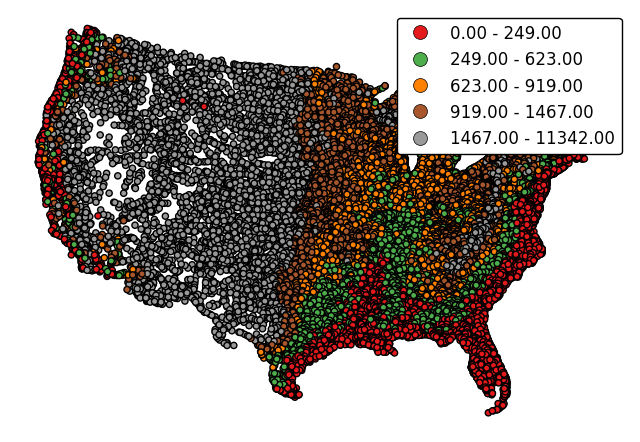

In [27]:
# saved to no. 10 FYI
gplt.pointplot(cities, projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True)

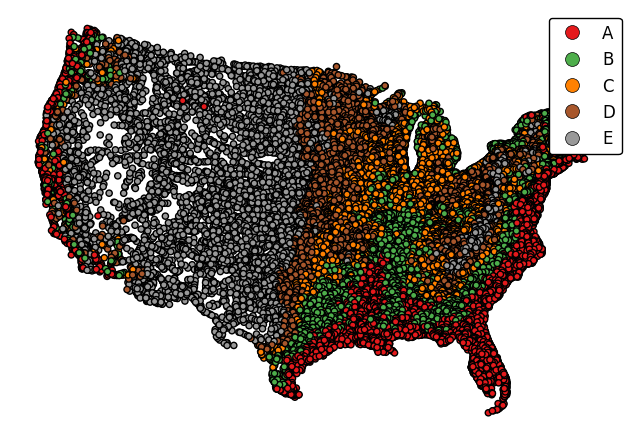

In [78]:
gplt.pointplot(cities, projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True, legend_labels=list('ABCDE'))

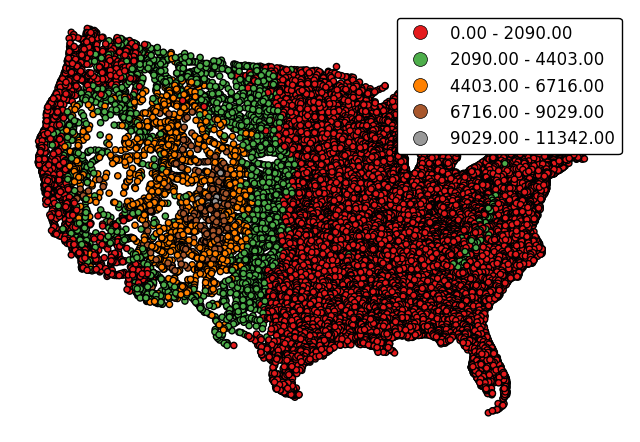

In [28]:
gplt.pointplot(cities, projection=ccrs.AlbersEqualArea(), hue='ELEV_IN_FT', legend=True, scheme='equal_interval')

In [5]:
collisions = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(5000), geometry=collisions.head(5000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

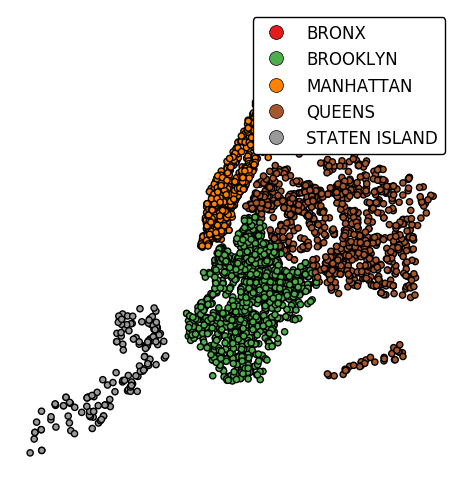

In [31]:
gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=ccrs.AlbersEqualArea(), hue='BOROUGH',
               legend=True, categorical=True)

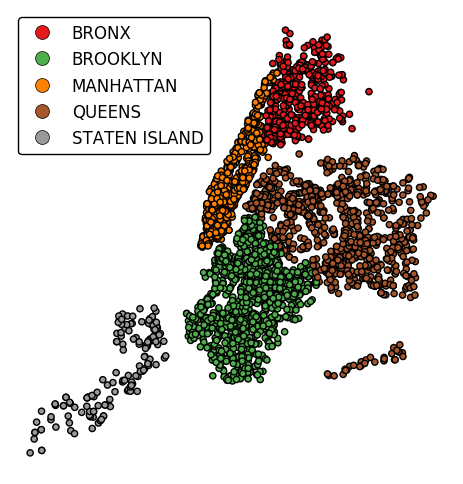

In [34]:
gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=ccrs.AlbersEqualArea(), 
               hue='BOROUGH', categorical=True,
               legend=True, legend_kwargs={'loc': 'upper left'})

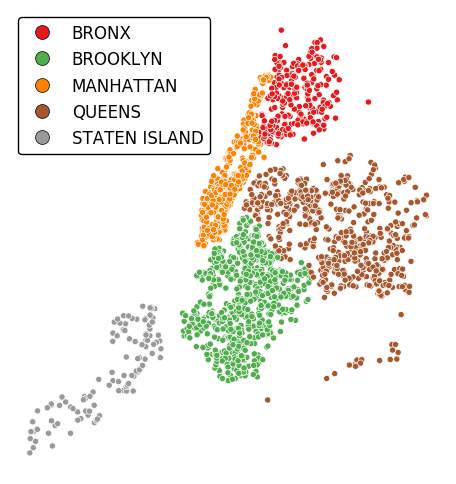

In [92]:
gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=ccrs.AlbersEqualArea(), 
               hue='BOROUGH', categorical=True, 
               legend=True, legend_kwargs={'loc': 'upper left'},
               edgecolor='white', linewidth=0.5)

In [36]:
more_points = utils.gaussian_points(n=3000)
data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
data = data.assign(var=data['classification'] * 0.5 + pd.Series([p.x + p.y for p in data['geometry']]) + 50 + np.random.normal(size=3000) * 8)

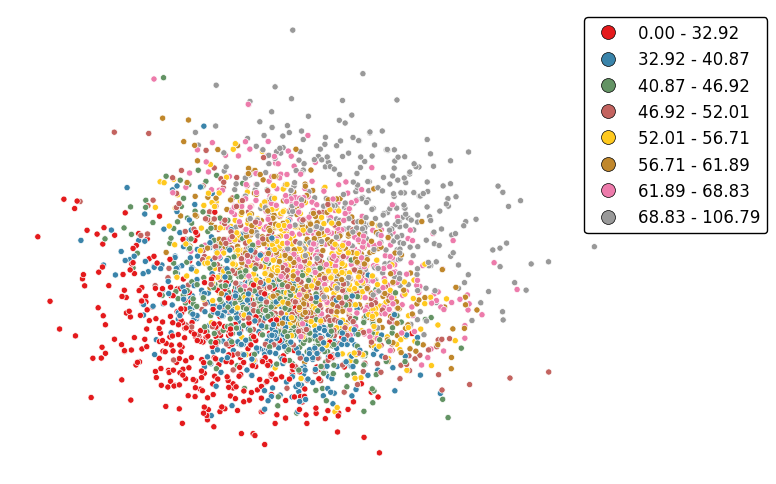

In [37]:
gplt.pointplot(data, projection=ccrs.AlbersEqualArea(),
               hue='var', k=8,
               edgecolor='white', linewidth=0.5,
               legend=True, legend_kwargs={'bbox_to_anchor': (1.25, 1.0)})

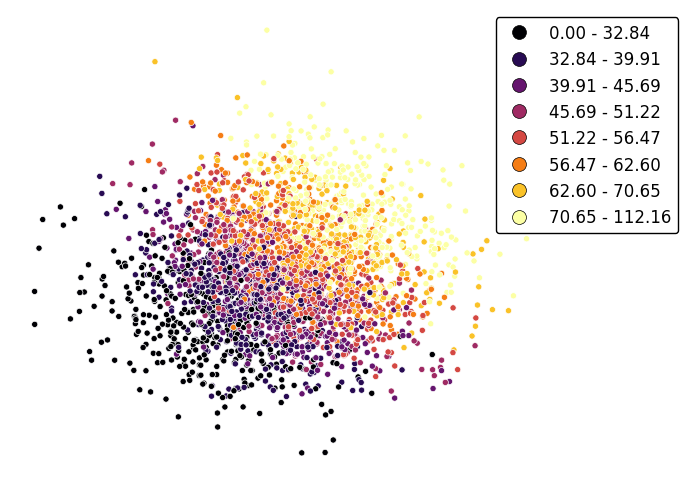

In [28]:
more_points = utils.gaussian_points(n=3000)
data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
data = data.assign(var=data['classification'] * 0.5 + pd.Series([p.x + p.y for p in data['geometry']]) + 50 + np.random.normal(size=3000) * 8)
gplt.pointplot(data, projection=ccrs.AlbersEqualArea(),
               hue='var', cmap='inferno', k=8,
               edgecolor='white', linewidth=0.5,
               legend=True, legend_kwargs={'bbox_to_anchor': (1.25, 1.0)})
# plt.savefig('./figures/pointplot/pointplot_demo_4.png')

In [125]:
# Unused.
# more_points = utils.gaussian_points(n=3000)
# data = gpd.GeoDataFrame(data={'classification': utils.classify_clusters(more_points, n=6)}, geometry=more_points)
# gplt.pointplot(data, projection=ccrs.AlbersEqualArea(),
#                hue='classification', categorical=True, 
#                edgecolor='white', linewidth=0.5)

# Choropleth

In [9]:
boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')

In [11]:
!mkdir ./figures/choropleth

In [103]:
from random import randint
polygons = utils.gaussian_polygons(n=20, points=utils.gaussian_points(n=3000))
polydata = gpd.GeoDataFrame(data={'classification': [randint(1, 20) for _ in range(len(polygons))]}, geometry=polygons)
# data = data.assign(var=data['classification'] * 0.5 + pd.Series([p.x + p.y for p in data['geometry']]) + 50 + np.random.normal(size=3000) * 8)

In [104]:
polydata['latdep'] = polydata['classification'] + np.random.normal() * 5 + 5 + polydata.geometry.envelope.exterior.map(lambda ext: ext.coords[0][1] + ext.coords[0][0])

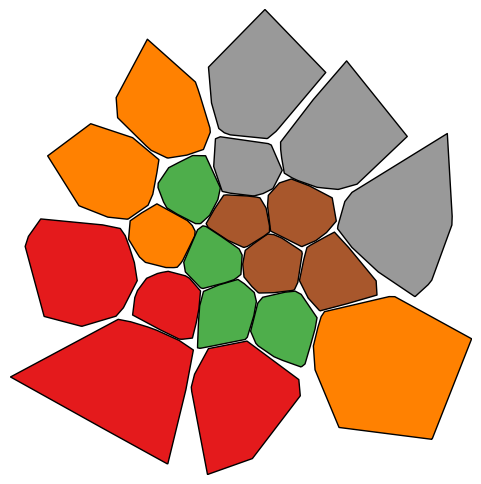

In [65]:
gplt.choropleth(polydata, hue='latdep', projection=ccrs.PlateCarree())

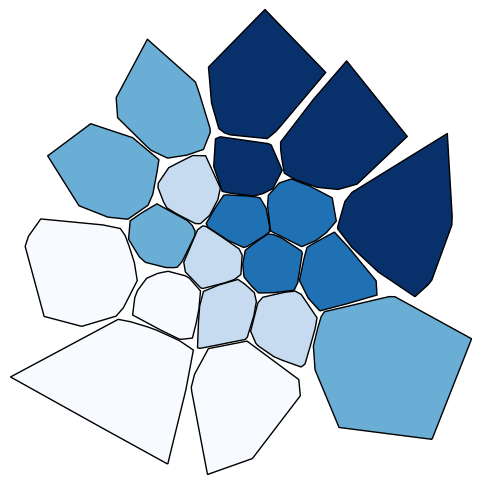

In [66]:
gplt.choropleth(polydata, hue='latdep', projection=ccrs.PlateCarree(), cmap='Blues')

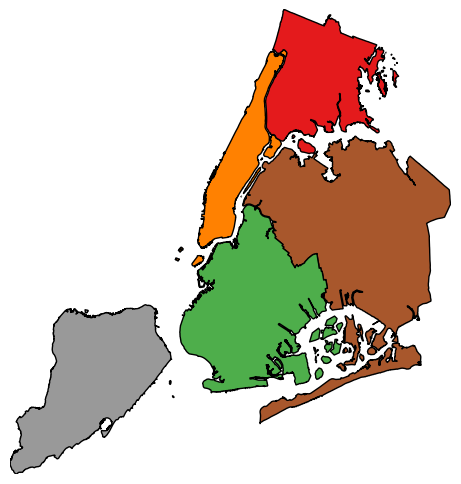

In [28]:
gplt.choropleth(boroughs, projection=ccrs.AlbersEqualArea(), hue='BoroName', categorical=True)

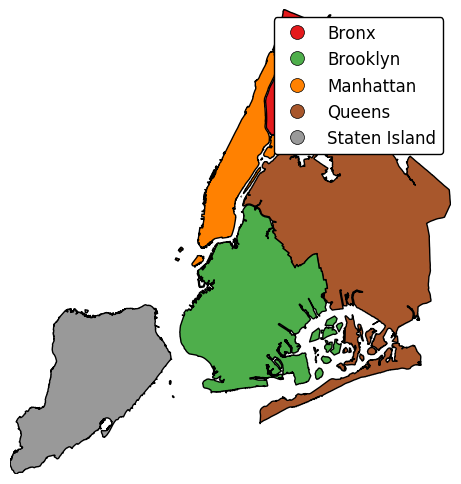

In [67]:
gplt.choropleth(boroughs, projection=ccrs.AlbersEqualArea(), hue='BoroName', categorical=True,
                legend=True)

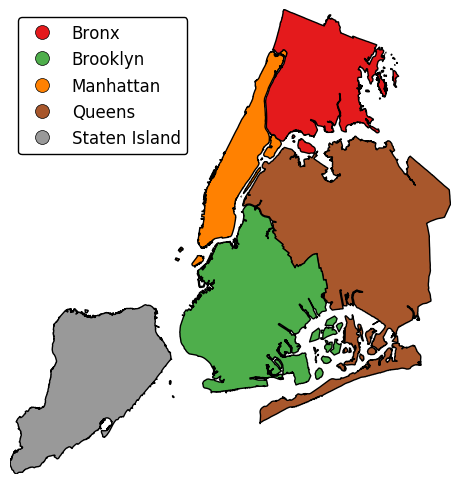

In [68]:
gplt.choropleth(boroughs, projection=ccrs.AlbersEqualArea(), hue='BoroName', categorical=True,
                legend=True, legend_kwargs={'loc': 'upper left'})

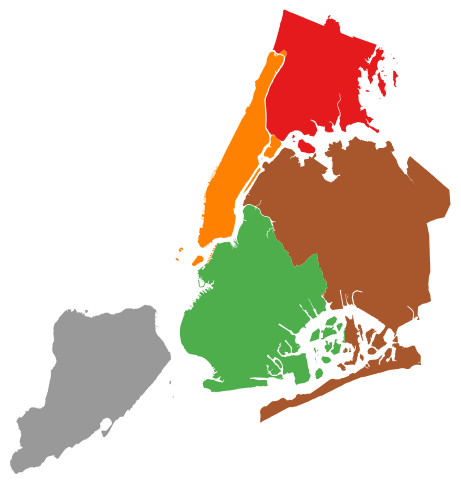

In [70]:
gplt.choropleth(boroughs, projection=ccrs.AlbersEqualArea(), hue='BoroName', categorical=True,
                linewidth=0)

In [110]:
from random import randint
census_tracts = gpd.read_file("../data/nyc_census_tracts/census_tracts_2010.geojson", driver='GeoJSON')
census_tracts['mock_data'] = [randint(10, 1000) for _ in range(len(census_tracts))]
census_tracts['mock_category'] = [randint(1, 5) for _ in range(len(census_tracts))]

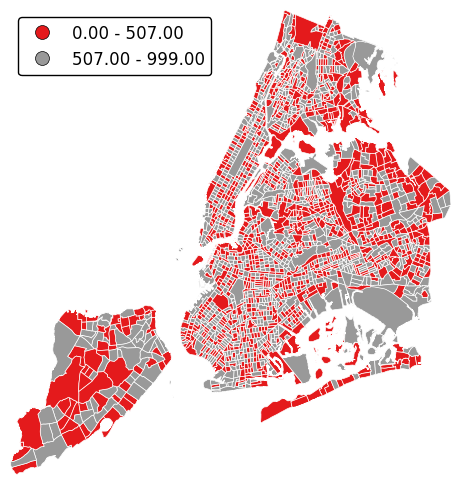

In [75]:
gplt.choropleth(census_tracts, hue='mock_data', projection=ccrs.AlbersEqualArea(),
                legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
                k=2)

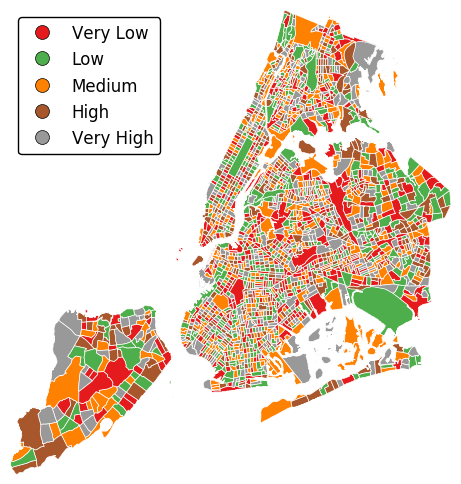

In [111]:
gplt.choropleth(census_tracts, hue='mock_data', projection=ccrs.AlbersEqualArea(),
                edgecolor='white', linewidth=0.5,
                legend=True, legend_kwargs={'loc': 'upper left'},
                legend_labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

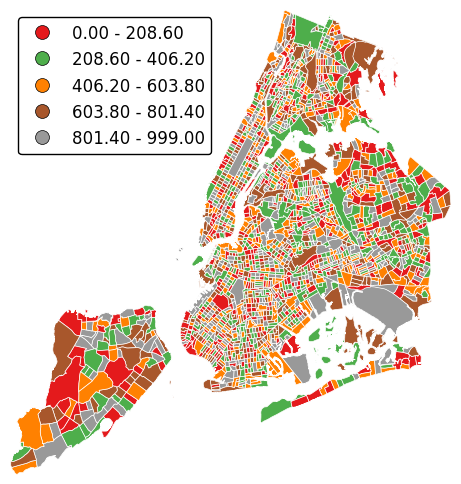

In [76]:
gplt.choropleth(census_tracts, hue='mock_data', projection=ccrs.AlbersEqualArea(),
                legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
                scheme='equal_interval')

# Polyplot

In [ ]:
!mkdir ./figures/polyplot

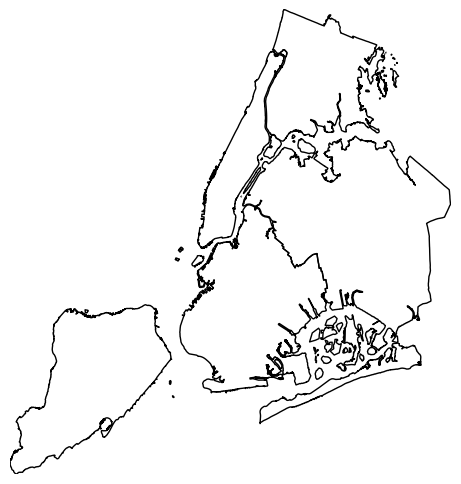

In [5]:
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea())

## Example 2

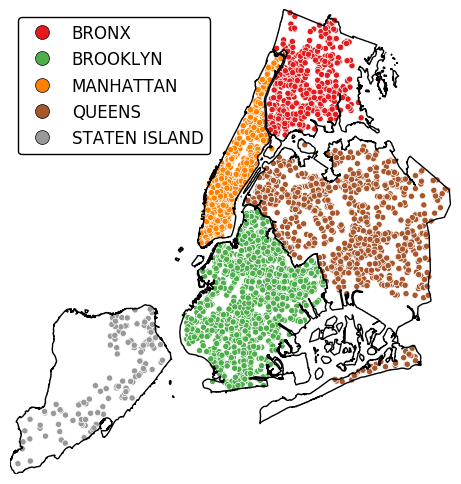

In [9]:
ax = gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea())
gplt.pointplot(collisions[collisions['BOROUGH'].notnull()], projection=ccrs.AlbersEqualArea(), 
               hue='BOROUGH', categorical=True, 
               legend=True, edgecolor='white', linewidth=0.5, legend_kwargs={'loc': 'upper left'},
               ax=ax)

# Aggplot

## Example 1

In [ ]:
!mkdir ./figures/aggplot

In [11]:
from shapely.geometry import Point

cdata = pd.read_csv("./data/NYPD_Motor_Vehicle_Collisions.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return Point(0, 0)
    else:
        return Point(lat, long)

# Limited test
# collisions = gpd.GeoDataFrame(cdata.head(1000), geometry=cdata.head(1000).apply(pointify, axis='columns'))
# collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

# Full test
collisions = gpd.GeoDataFrame(cdata.head(10000), geometry=cdata.head(10000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

latmax, latmin, longmax, longmin = collisions['LATITUDE'].max(), collisions['LATITUDE'].min(),\
                                   collisions['LONGITUDE'].max(), collisions['LONGITUDE'].min()
    
def genpattern(srs):
    return (srs['LATITUDE'] - latmin) / (latmax - latmin)

collisions['LATDEP'] = collisions.apply(genpattern, axis='columns')

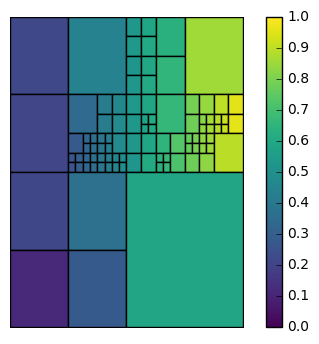

In [12]:
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='LATDEP')

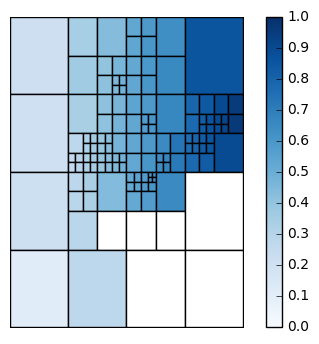

In [13]:
gplt.aggplot(collisions, nmin=20, nmax=500, projection=ccrs.PlateCarree(), hue='LATDEP', cmap='Blues')

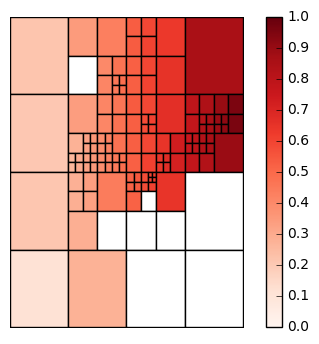

In [14]:
gplt.aggplot(collisions, nmin=20, nmax=500, nsig=5, projection=ccrs.PlateCarree(), hue='LATDEP', cmap='Reds')

In [15]:
collisions.head(1)

TIME BOROUGH  ZIP CODE   LATITUDE  LONGITUDE  \
DATE                                                       
04/16/2016  4:13     NaN       NaN  40.767373 -73.950057   

                            LOCATION  ON STREET NAME CROSS STREET NAME  \
DATE                                                                     
04/16/2016  (40.767373, -73.9500574)  EAST 68 STREET               NaN   

           OFF STREET NAME  NUMBER OF PERSONS INJURED    ...     \
DATE                                                     ...      
04/16/2016             NaN                          1    ...      

            CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
DATE                                                                       
04/16/2016                            NaN                            NaN   

            UNIQUE KEY  VEHICLE TYPE CODE 1  VEHICLE TYPE CODE 2  \
DATE                                                               
04/16/2016     3408932    PASSENGER VEHICLE    PASSENGER VEHICLE   

            VEHICLE TYPE CODE 3  VEHICLE TYPE CODE 4 VEHICLE TYPE CODE 5  \
DATE                                                                       
04/16/2016    PASSENGER VEHICLE                  NaN                 NaN   

                                        geometry    LATDEP  
DATE                                                        
04/16/2016  POINT (40.767373 -73.95005740000001)  0.643588  

[1 rows x 30 columns]

In [ ]:
gplt.aggplot(data, projection=ccrs.AlbersEqualArea(),
               hue='var', cmap='inferno', k=8,
               edgecolor='white', linewidth=0.5,
               legend=True, legend_kwargs={'bbox_to_anchor': (1.25, 1.0)})

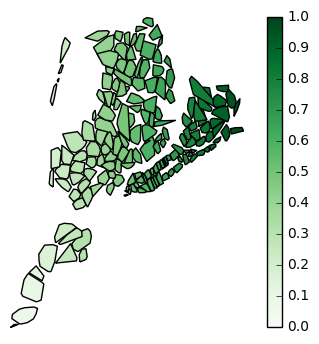

In [32]:
# No good until the rotation issue is sorted out.
gplt.aggplot(collisions[collisions['ZIP CODE'].notnull()], projection=ccrs.PlateCarree(),
             hue='LATDEP', by='ZIP CODE', cmap='Greens')

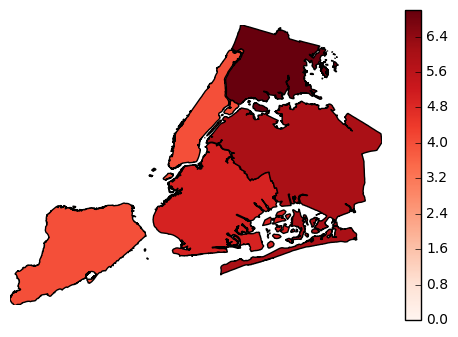

In [37]:
boroughs_2 = boroughs.set_index('BoroName')
boroughs_2.index = [b.upper() for b in boroughs_2.index]
gplt.aggplot(collisions, projection=ccrs.PlateCarree(), hue='NUMBER OF PERSONS INJURED', cmap='Reds',
             geometry=boroughs_2, by='BOROUGH', agg=np.max)

# Cartogram

## Example 1

In [5]:
!mkdir ./figures/cartogram

In [3]:
boroughs = gpd.read_file("./data/boroughs.geojson", driver='GeoJSON')
boroughs['Population'] = [378, 1951, 2300, 1487, 1203]
boroughs['Population Density'] = boroughs['Population'] / boroughs['Shape_Area']

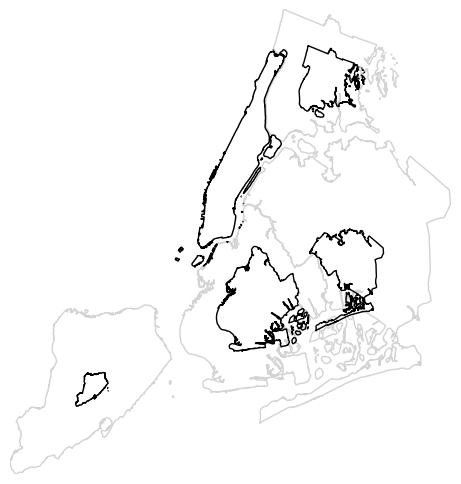

In [14]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea())

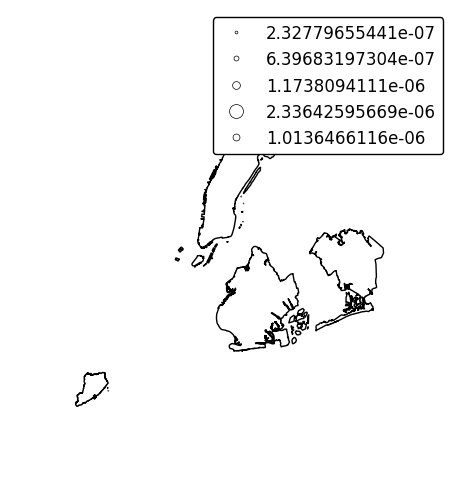

In [13]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(),
               trace=False, legend=True)

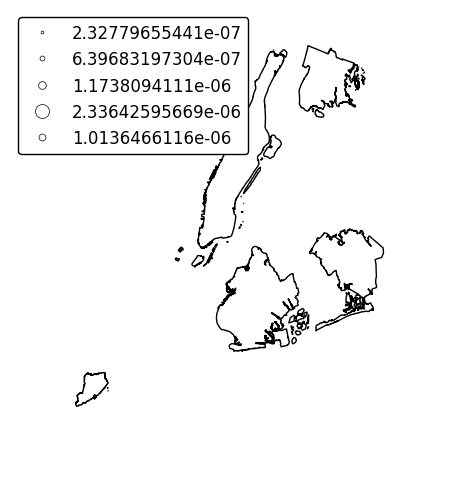

In [7]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(),
               trace=False, legend=True, legend_kwargs={'loc': 'upper left'})

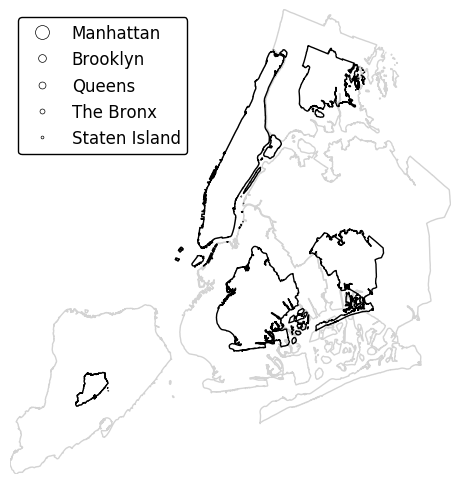

In [9]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(), legend=True,
               legend_values=[2.32779655e-07, 6.39683197e-07, 1.01364661e-06, 1.17380941e-06, 2.33642596e-06][::-1],
               legend_labels=['Manhattan', 'Brooklyn', 'Queens', 'The Bronx', 'Staten Island'],
               legend_kwargs={'loc': 'upper left'})

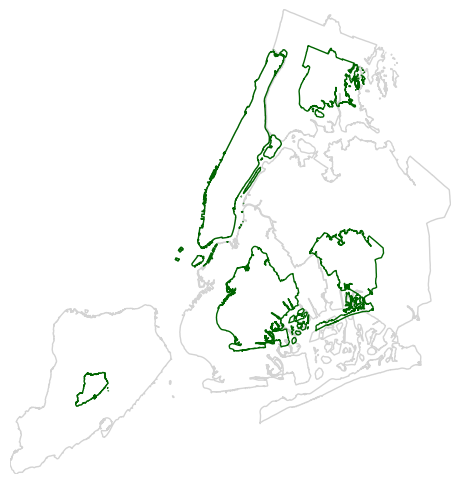

In [12]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(),
               edgecolor='darkgreen')

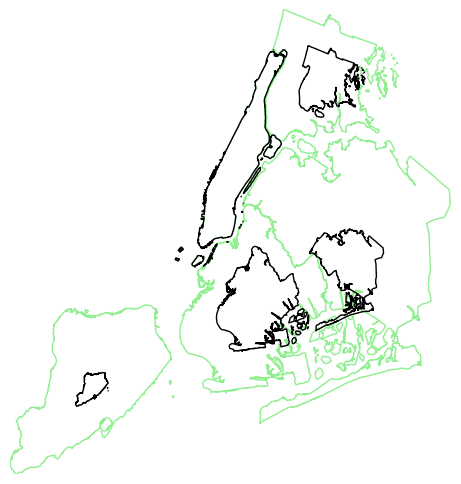

In [17]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(),
               trace_kwargs={'edgecolor': 'lightgreen'})

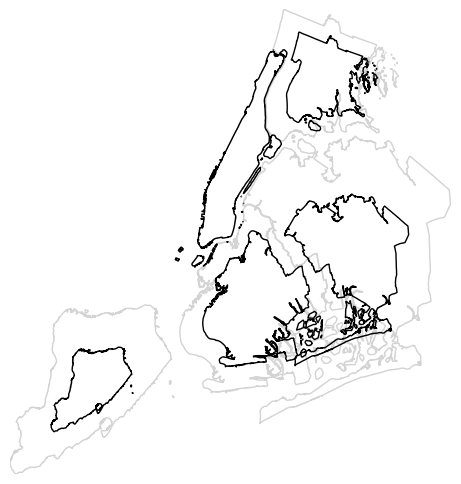

In [19]:
gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(),
               limits=(0.5, 1))

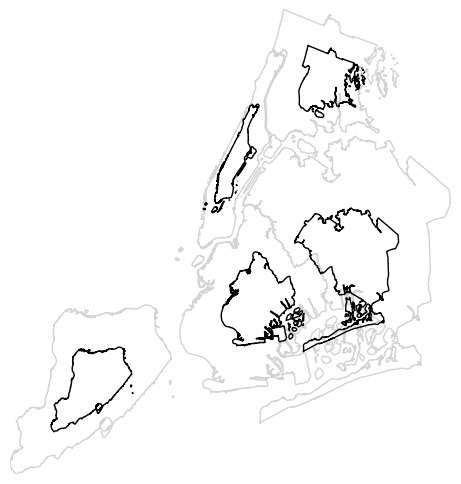

In [24]:
def trivial_scale(minval, maxval):
    def scalar(val):
        return 0.5
    return scalar

gplt.cartogram(boroughs, scale='Population Density', projection=ccrs.AlbersEqualArea(),
               limits=(0.5, 1), scale_func=trivial_scale)

## KDEPlot

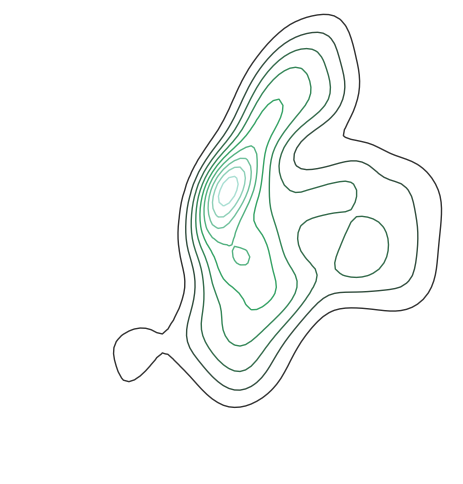

In [6]:
gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea())

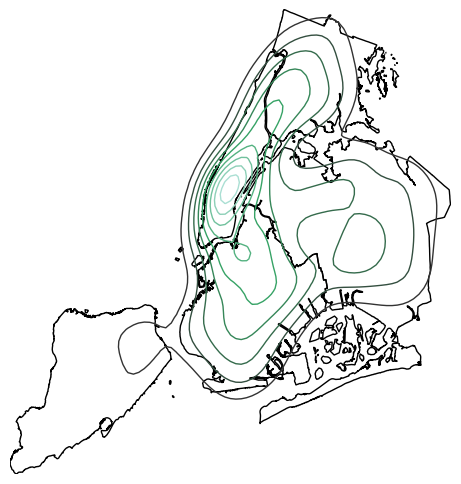

In [10]:
ax = gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea())
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

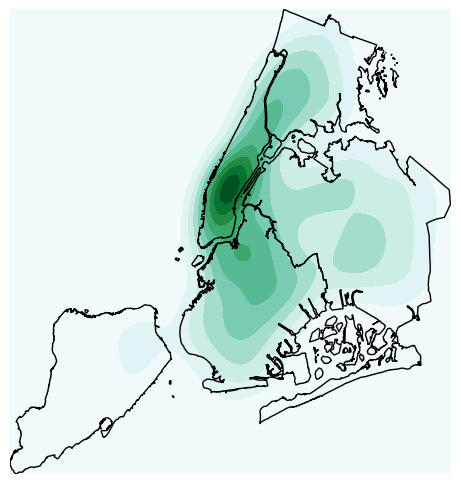

In [12]:
ax = gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), shade=True)
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

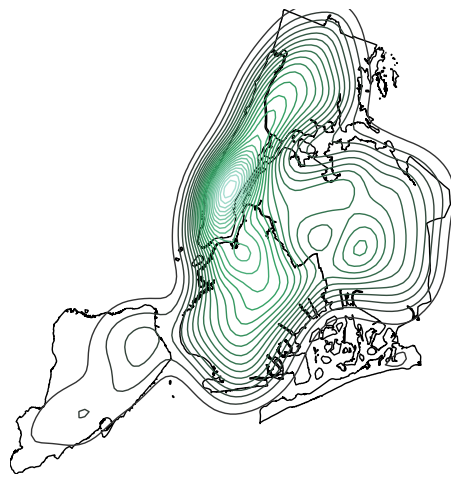

In [13]:
ax = gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), n_levels=30)
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

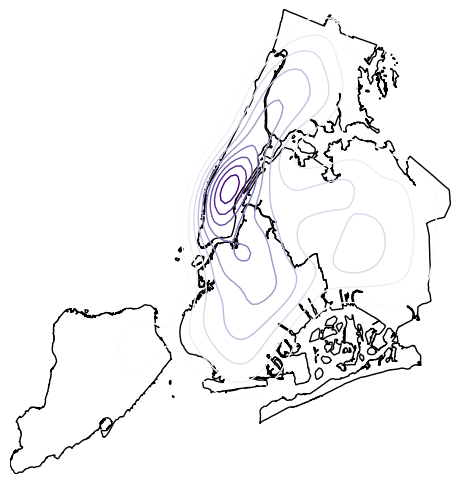

In [14]:
ax = gplt.kdeplot(collisions, projection=ccrs.AlbersEqualArea(), cmap='Purples')
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

## Sankey

In [47]:
from shapely.geometry import Point
starting_points = gpd.GeoSeries([Point(-90, 45), Point(20, 45)])
ending_points = gpd.GeoSeries([Point(45, 45), Point(35, 0)])
mock_data = pd.DataFrame(data={'origin': starting_points, 'destination': ending_points})

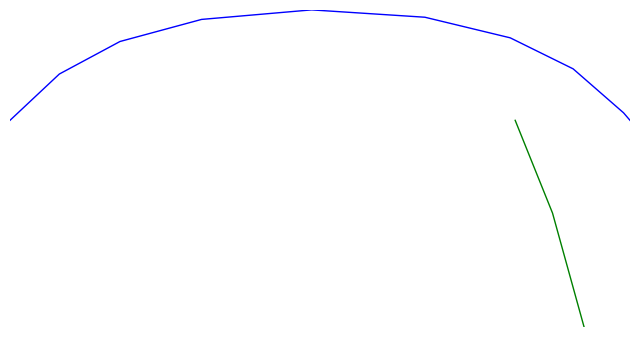

In [48]:
gplt.sankey(mock_data, start='origin', end='destination', projection=ccrs.PlateCarree())

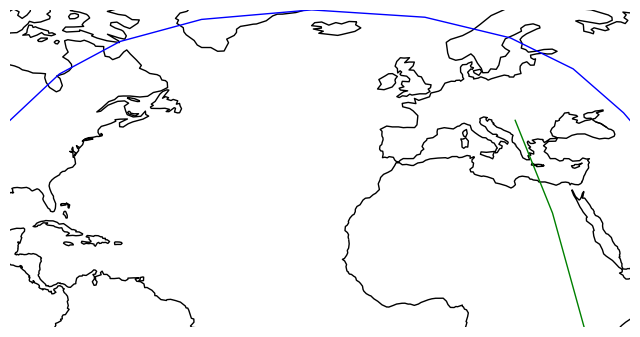

In [49]:
ax = gplt.sankey(mock_data, start='origin', end='destination', projection=ccrs.PlateCarree())
ax.coastlines()

In [32]:
network = utils.uniform_random_global_network()

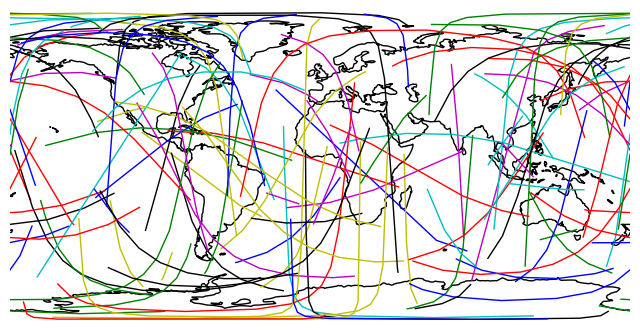

In [56]:
ax = gplt.sankey(projection=ccrs.PlateCarree(), start=network['from'], end=network['to'])
ax.set_global()
ax.coastlines()

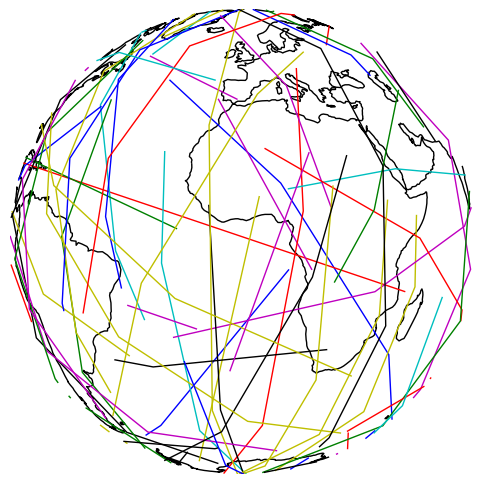

In [55]:
ax = gplt.sankey(projection=ccrs.Orthographic(), start=network['from'], end=network['to'],
                 extent=(-180, 180, -90, 90))
ax.set_global()
ax.coastlines()

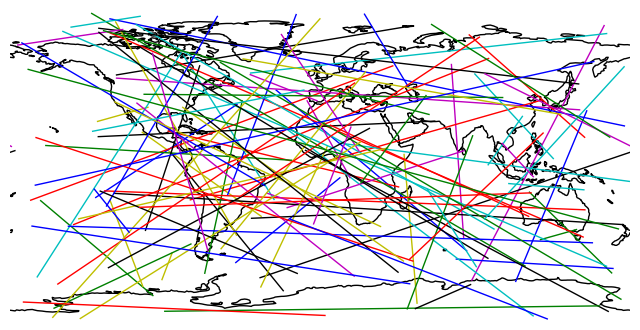

In [60]:
from cartopy.crs import PlateCarree

ax = gplt.sankey(projection=ccrs.PlateCarree(), start=network['from'], end=network['to'],
                 path=PlateCarree())
ax.set_global()
ax.coastlines()

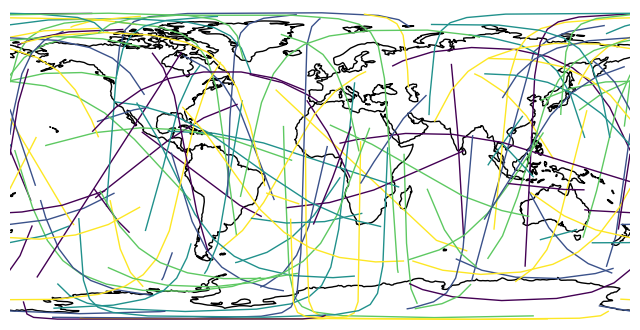

In [95]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable')
ax.set_global()
ax.coastlines()

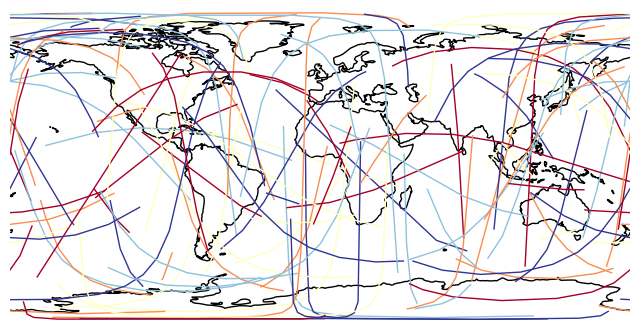

In [96]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu')
ax.set_global()
ax.coastlines()

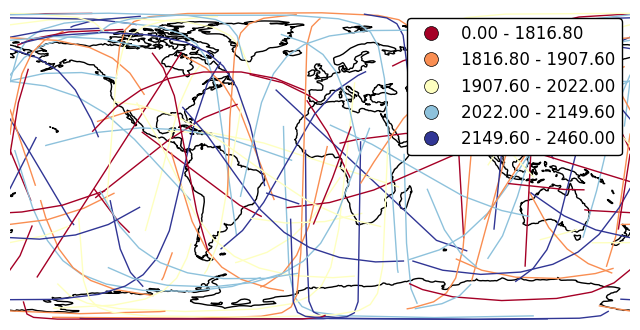

In [97]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True)
ax.set_global()
ax.coastlines()

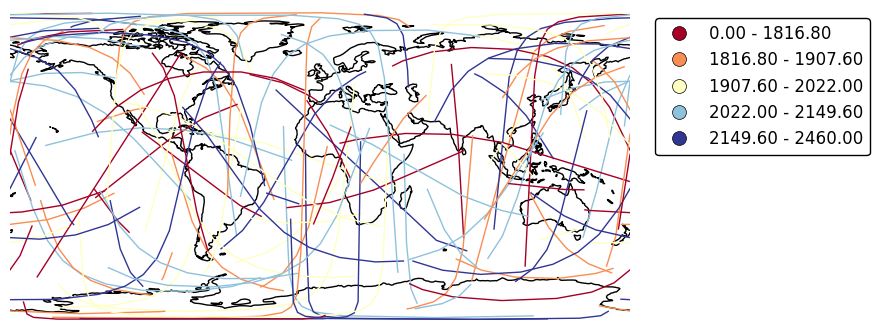

In [98]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.4, 1.0)})
ax.set_global()
ax.coastlines()

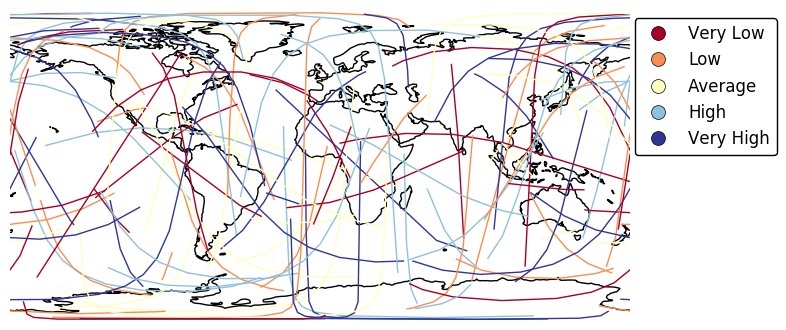

In [99]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.25, 1.0)},
                 legend_labels=['Very Low', 'Low', 'Average', 'High', 'Very High'])
ax.set_global()
ax.coastlines()

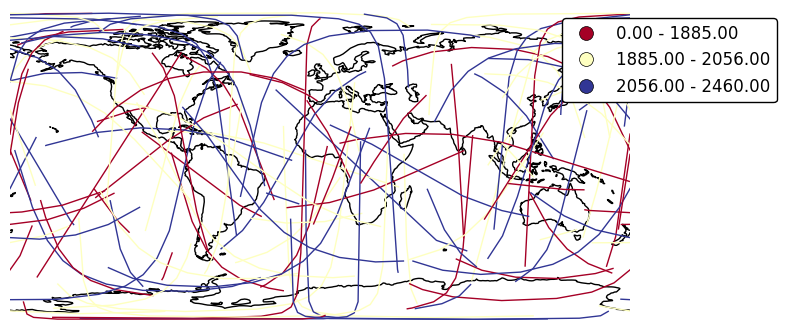

In [100]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.25, 1.0)},
                 k=3)
ax.set_global()
ax.coastlines()

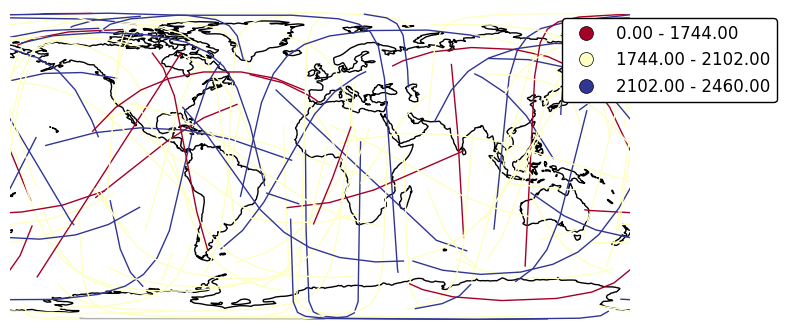

In [101]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='mock_variable', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.25, 1.0)},
                 k=3, scheme='equal_interval')
ax.set_global()
ax.coastlines()

In [89]:
network['above_meridian'] = network['from'].map(lambda point: point.y > 0)

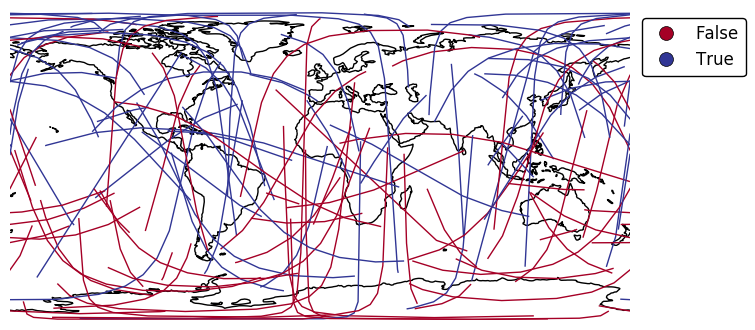

In [102]:
ax = gplt.sankey(network, projection=ccrs.PlateCarree(),
                 start='from', end='to',
                 hue='above_meridian', cmap='RdYlBu',
                 legend=True, legend_kwargs={'bbox_to_anchor': (1.2, 1.0)},
                 categorical=True)
ax.set_global()
ax.coastlines()